# Основы машинного обучения: лабораторная работа №2
## <!--Задание 1. -->Регрессионный анализ

В этом задании необходимо реализовать обучающиеся модели в контексте решения задачи регрессии на одном из представленных по варианту задания наборе данных.

### Цель

Получение навыков решения задачи регрессионного анализа и оптимизации функций методом градиентного спуска

### Оценивание и баллы

За это задание в общей сложности можно получить до 8 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить все приведенные ниже задачи.


***
#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [102]:
### BEGIN YOUR CODE

Student_ID = 4

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [103]:
datasets = [('Combined Cycle Power Plant','https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant'), ('Beijing PM2.5','https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data'), ('Airfoil Self-Noise','https://archive.ics.uci.edu/dataset/291/airfoil+self+noise'), ('Energy Efficiency','https://archive.ics.uci.edu/dataset/242/energy+efficiency'), ('Bike Sharing','https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset'), ('Diabetes dataset','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'), ('California Housing','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#fetch-california-housing'), ('Auto MPG', 'https://archive.ics.uci.edu/dataset/9/auto+mpg'), ('Forest Fires', 'https://archive.ics.uci.edu/dataset/162/forest+fires'), ('Concrete Compressive Strength', 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Информация о датасете '{datasets[dataset_id][0]}' доступна по следующей ссылке: {datasets[dataset_id][1]}")

Информация о датасете 'Bike Sharing' доступна по следующей ссылке: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


#### 2. Подготовить среду разработки и данные
Добавьте импорт всех необходимых библиотек в ячейке ниже. Постарайтесь не импортировать библиотеки в других ячейках, чтобы избежать ошибок в коде

In [104]:
### BEGIN YOUR CODE

import pandas as pd
import matplotlib as mp
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from matplotlib import pyplot as plt
import numpy as np

### END YOUR CODE

При необходимости скачайте датасет с помощью команды `!wget ...` и разархивируйте его. Загрузите датасет в переменную `dataset`, с которой будете дальше работать

In [105]:
### BEGIN YOUR CODE

# !wget https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip

# !unzip bike+sharing+dataset.zip
# # !tar ...
# # !gunzip ...

# dataset = pd.read_csv('hour.csv')

### END YOUR CODE

--2025-05-31 16:57:16--  https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bike+sharing+dataset.zip.6’

bike+sharing+datase     [   <=>              ] 273.43K   529KB/s    in 0.5s    

2025-05-31 16:57:17 (529 KB/s) - ‘bike+sharing+dataset.zip.6’ saved [279992]

Archive:  bike+sharing+dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


####  3. Посмотреть на общую картину (0.5 балла)
Ознакомьтесь с информацией о датасете по ссылке из задания и **напишите один абзац текста с описанием решаемой задачи**. В частности, ответьте в своем тексте на следующие вопросы:

 * Каков размер датасета? (в Мб)
 * Сколько в нем записей (объектов)?
 * Сколько признаков (фич) у объектов в датасете?
 * Есть ли категориальные данные? Какие?
 * Есть ли пропущенные значения?
 * Есть ли в датасете столбец с ответами (target)? Какой у него тип данных?
 * Какую задачу может решать регрессионная модель, построенная на этом датасете? Какую величину она будет предсказывать?
 * Приведите основные статистические данные о датасете, которые можно получить вызовом одной-двух функций в pandas. Какие выводы о датасете можно сделать?

В ячейке ниже напишите код, который выводит всю необходимую информацию, а в ячейке под ней (ее тип - Markdown, т.е. текст) опишите своими словами решаемую задачу и используемый набор данных.

In [106]:
dataset.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


Датасет, приложенный по ссылке в задании представлен в виде двух файлов: day.csv и hour.csv\
<br>
<b>day.csv</b>\
Размер: 57кб\
Количество записей: 731\
<b>hour.csv</b>\
Размер: 1 156кб\
Количество записей: 17379\
<br>
Датасет решает задачу анализа количества арендованных велосипедов какой то организации (о чем свидетельствуют столбцы, связанные с зарегистрированными пользователями)/
В датасете присутствует 14 фича столбцов, из которых 4 категориальных, а так же 1 целевой столбец: "cnt", являющийся суммой стобцов casual и registered

Регрессионная модель, построенная на основе данного датасета будет решать задачу преслказывания значения cnt в зависимости от представленных признаков.
<!-- Размер датасета составляет 100500 килобайт, что соответствует 100,5 мегабайтам. В датасете содержится описание ... -->

---
#### 4. Анализ данных, очистка, и масштабирование (2 балла)

**Анализ данных:** проверьте наличие корреляции между признаками, постройте корреляционную матрицу. Некоторые из признаков могут оказаться более коррелированными с объясняемой переменной (target), чем остальные. Эта информация в дальнейшем поможет провалидировать найденные коэффициенты регрессионной модели.

**Очистка данных:** если датасет содержит пропущенные значения, заполните их с помощью модуля [`sklearn.impute`](https://scikit-learn.org/stable/modules/impute.html). Если в датасете есть категориальные признаки, [преобразуйте их в числовые](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features) с помощью `OneHotEncoder`.

**Масштабирование признаков.** Напишите код, осуществляющий нормализацию значений всех признаков [следующим образом](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling):

- вычесть среднее значение соответствующего признака из всех значений этого признака;
- отмасштабировать (поделить) значения признаков на СКО этих признаков.

**Особенности реализации:** напишите код, который реализует последовательность (пайплайн) обработки обучающих данных, а затем примените его к валидационной и тестовой выборкам в случае их наличия.

In [107]:
#Анализ пропусков
# 1. Проверка наличия пропусков в каждом столбце
columns_with_missing = df.columns[df.isnull().any()].tolist()

print("Столбцы с пропущенными значениями:")
print(columns_with_missing or 'нет')

Столбцы с пропущенными значениями:
нет


In [108]:
#Матрица корреляции с стилизацией

df = dataset.drop(['dteday'], axis=1)

corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [109]:
#Функция для анализа корелляции данных


def plot_mean_bar(df, group_column, value_column, color='skyblue', figsize=(10, 6)):
    """
    Строит столбчатую диаграмму средних значений по группам.

    Параметры:
    ----------
    df : pandas.DataFrame
        Исходный DataFrame с данными
    group_column : str
        Название столбца для группировки (ось X)
    value_column : str
        Название столбца со значениями для расчёта среднего (ось Y)
    color : str, optional
        Цвет столбцов (по умолчанию 'skyblue')
    figsize : tuple, optional
        Размер графика (по умолчанию (10, 6))
    """
    # Группируем данные и вычисляем среднее
    grouped_data = df.groupby(group_column)[value_column].mean().reset_index()

    # Создаем график
    plt.figure(figsize=figsize)
    plt.bar(grouped_data[group_column], grouped_data[value_column], color=color)

    # Добавляем подписи
    plt.title(f'Среднее значение {value_column} для каждого {group_column}')
    plt.xlabel(group_column)
    plt.ylabel(f'Среднее значение {value_column}')
    plt.xticks(grouped_data[group_column])  # Отображаем все значения на оси X

    # Добавляем сетку и настраиваем layout
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#Функция для аналогичной работы но пир не категориальных столбцах

def plot_mean_bar_binned(df, num_column, value_column, bins=10,
                        color='skyblue', figsize=(10, 6),
                        xlabel_format=None):
    """
    Строит столбчатую диаграмму средних значений после дискретизации числового столбца.

    Параметры:
    ----------
    df : pandas.DataFrame
        Исходный DataFrame с данными
    num_column : str
        Название числового столбца для дискретизации и группировки (ось X)
    value_column : str
        Название столбца со значениями для расчёта среднего (ось Y)
    bins : int или list или array-like, optional
        Количество бинов или их границы (по умолчанию 10)
    color : str, optional
        Цвет столбцов (по умолчанию 'skyblue')
    figsize : tuple, optional
        Размер графика (по умолчанию (10, 6))
    xlabel_format : str, optional
        Формат подписей бинов (например "{:.1f}-{:.1f}")
    """
    # Создаем копию DataFrame чтобы не изменять исходный
    df_plot = df.copy()

    # Дискретизируем числовой столбец
    df_plot['bins'] = pd.cut(df_plot[num_column], bins=bins)

    # Группируем по бинам и вычисляем среднее
    grouped = df_plot.groupby('bins')[value_column].mean().reset_index()

    # Формируем подписи для оси X
    if xlabel_format:
        labels = [xlabel_format.format(b.left, b.right) for b in grouped['bins']]
    else:
        labels = [str(b) for b in grouped['bins']]

    # Создаем график
    plt.figure(figsize=figsize)
    bars = plt.bar(range(len(grouped)), grouped[value_column], color=color)

    # Добавляем подписи
    plt.title(f'Среднее значение {value_column} по диапазонам {num_column}')
    plt.xlabel(f'Диапазоны {num_column}')
    plt.ylabel(f'Среднее значение {value_column}')
    plt.xticks(range(len(grouped)), labels, rotation=45, ha='right')

    # Добавляем сетку и настраиваем layout
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

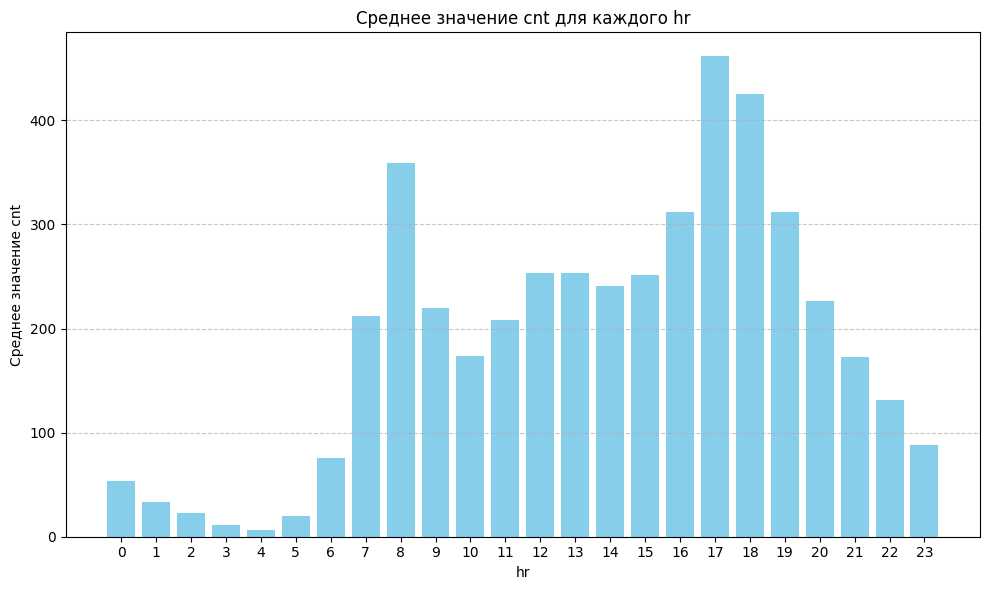

In [110]:
# Анализ купленных байков от часа
plot_mean_bar(df, group_column='hr', value_column='cnt')

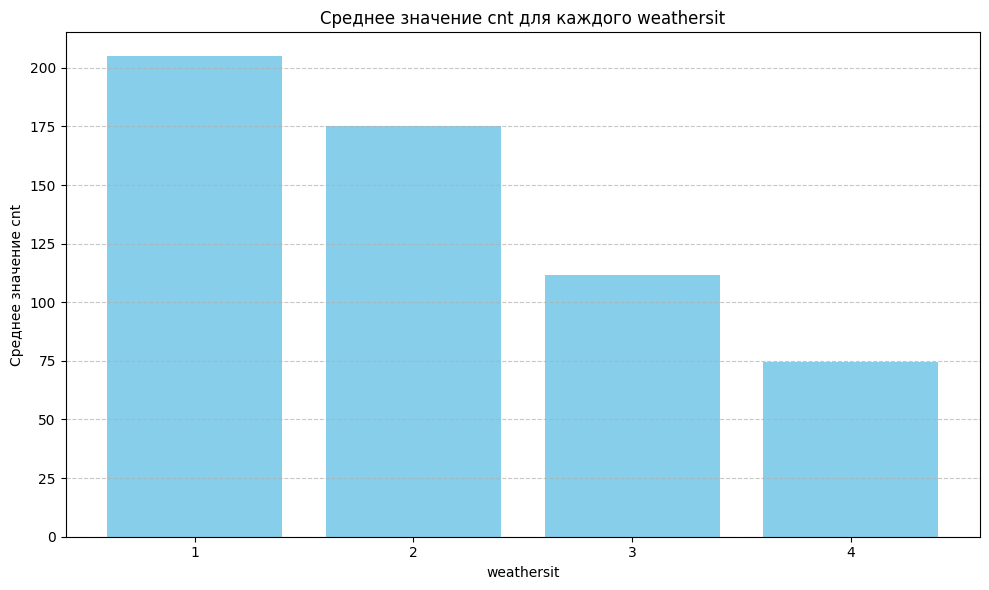

In [111]:
plot_mean_bar(df, group_column='weathersit', value_column='cnt')

<ipython-input-109-8f05fb6edc37>:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_plot.groupby('bins')[value_column].mean().reset_index()


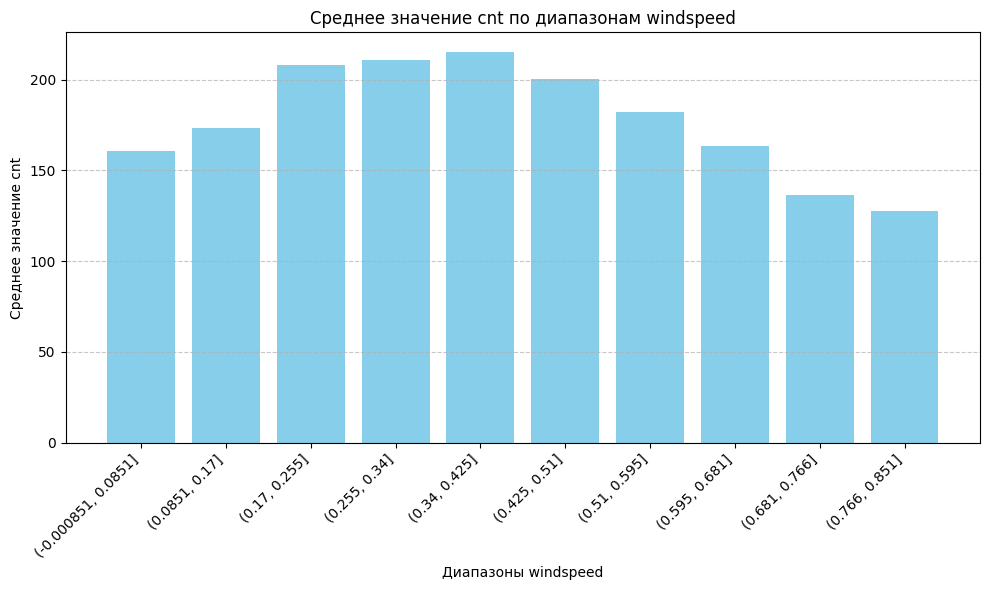

In [112]:
plot_mean_bar_binned(df, num_column='windspeed', value_column='cnt')

<ipython-input-109-8f05fb6edc37>:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_plot.groupby('bins')[value_column].mean().reset_index()


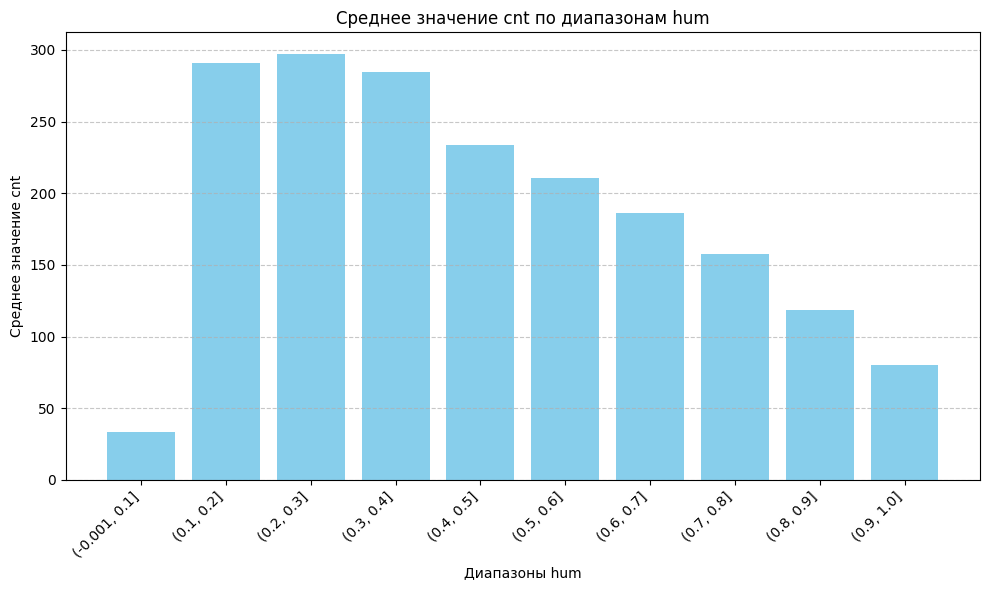

In [113]:
plot_mean_bar_binned(df, num_column='hum', value_column='cnt')

In [114]:
# Убираем признаки с сильной корелляцией с нерезультирующими признаками, а так же составные части результрующего признака

df = df.drop(['atemp', 'season', 'casual', 'registered'], axis=1)

#Удаляем столбцы с нелинейной зависимостью
df = df.drop(['windspeed'], axis=1)


In [115]:

# Выбираем категориальные столбцы
cat_cols = ['hr', 'mnth', 'weekday']

# Применяем One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[cat_cols])

# Преобразуем в DataFrame
encoded_df = pd.DataFrame(encoded_data,
                         columns=encoder.get_feature_names_out(cat_cols))

df = pd.concat([
    df.drop(columns=cat_cols),
    encoded_df
], axis=1)


In [116]:
#Нормализуем ненормализованные столбцы
numeric_cols = ['weathersit']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### END YOUR CODE

In [117]:
df

,instant,yr,holiday,workingday,weathersit,temp,hum,cnt,hr_0,hr_1,...,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,0,0,-0.665193,0.24,0.81,16,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0,0,0,-0.665193,0.22,0.80,40,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,0,0,0,-0.665193,0.22,0.80,32,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0,0,0,-0.665193,0.24,0.75,13,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,0,0,-0.665193,0.24,0.75,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,0,1,0.898924,0.26,0.60,119,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17375,17376,1,0,1,0.898924,0.26,0.60,89,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17376,17377,1,0,1,-0.665193,0.26,0.60,90,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17377,17378,1,0,1,-0.665193,0.26,0.56,61,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [101]:
#Разделяем датасет на обучающую и контрольную выборки с помощью StratifiedShuffleSplit
X = df.drop(['cnt'], axis=1)
Y = df['cnt']

splitter = StratifiedShuffleSplit(
    n_splits=1,          # Количество разбиений
    test_size=0.2,       # Доля тестовой выборки (20%)
    random_state=42      # Для воспроизводимости
)

# Получаем индексы для train и test
for train_index, test_index in splitter.split(X, Y):
    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

- - -
#### 5. Реализовать градиентный спуск (3 балла)
Используйте описание метода градиентного спуска, которое было приведено на лекции. Не забудьте добавить в матрицу признаков обучающей выборки столбец $\textbf{x}_0$, заполненный единицами. Напишите код, реализующий класс **LinearRegressionModel** и объявленные в нем методы.

**Градиентный спуск:** ЗАПРЕЩАЕТСЯ вызывать какие-либо библиотечные функции и использовать иной готовый код для построения модели линейной регрессии и поиска ее параметров. Можно использовать только базовые математические операции из пакета numpy, например, скалярное произведение и матричное умножение. Проследите, чтобы код для обучения модели был полностью векторизован.

In [ ]:
# Внимание: нельзя использовать библиотечный код для реализации линейной регрессии, напишите свой!
# Не забудьте поменять значения self.attribute = 0 на более подходящие или (лучше) задать их перед началом обучения

class LinearRegressionModel:
    """
    Перечень действий, которые можно выполнить с моделью
    """

    def __init__ (self):
        """
        Инициализация модели
        """
        self.theta = None # вектор параметров модели
        self.alpha = 0.1  # скорость обучения
        self.cost  = 0    # значение функционала качества обученной модели (значение функции стоимости)

    def gradient_descent(self, X_train, y_train, theta, alpha, iters):
        """
        Реализация градиентного спуска
        Входные данные:
        alpha: скорость обучения
        iters: количество итераций

        Выходные данные:
        theta: обновлённое значение вектора параметров
        cost: итоговое значение функции стоимости
        """
        # поместите сюда ваш код
        return self.theta, self.cost

    def fit_with_GD(self, X_train, y_train, iters=200):
        """
        Обучение модели методом градиентного спуска
        """
        # поместите сюда ваш код для инициализации алгоритма подбора параметров методом градиентного спуска
        self.theta, self.cost = self.gradient_descent(X_b, y_train, self.theta, self.alpha, iters)
        return self.cost

    def fit_with_normal_equations(self, X_train, y_train):
        """
        Обучение с помощью решения системы нормальных уравнений (МНК)
        """
        #  поместите сюда ваш код для задания 5
        return self.cost

    def predict(self, X_test):
        """
        Предсказание значения с помощью обученной модели
        """
        # поместите сюда ваш код
        y_predict = None
        return y_predict

    def __str__(self):
        """
        Вывод всех параметров модели при вызове функции print()
        """
        return f"Вектор параметров: {self.theta}"



my_model = LinearRegressionModel()
# поместите сюда ваш код для вызова экземпляра класса LinearRegressionModel

print(my_model)

Вектор параметров: None


* **Скорость обучения:** попробуйте использовать разные скорости обучения и подберите такое значение, которое обеспечивает быструю сходимость. При выборе скорости обучения нужно следить за графиком функции качества (стоимости), построенном относительно количества итераций работы алгоритма градиентного спуска. Значение функционала качества $Q(\theta)$ должно быстро убывать и стремиться к небольшому значению. Такое поведение также является свидетельством того, что алгоритм работает корректно. Если скорость обучения слишком большая, значение функционала качества $Q(\theta)$ может начать колебаться и расти. По графику, который должен строить код в ячейке ниже, необходимо выбрать наиболее подходящую скорость обучения из числа проанализированных, и обосновать свой выбор. Без этого объяснения баллы за данную задачу начислены не будут.

Text(0.5, 1.0, 'Error vs. Training Iterations')

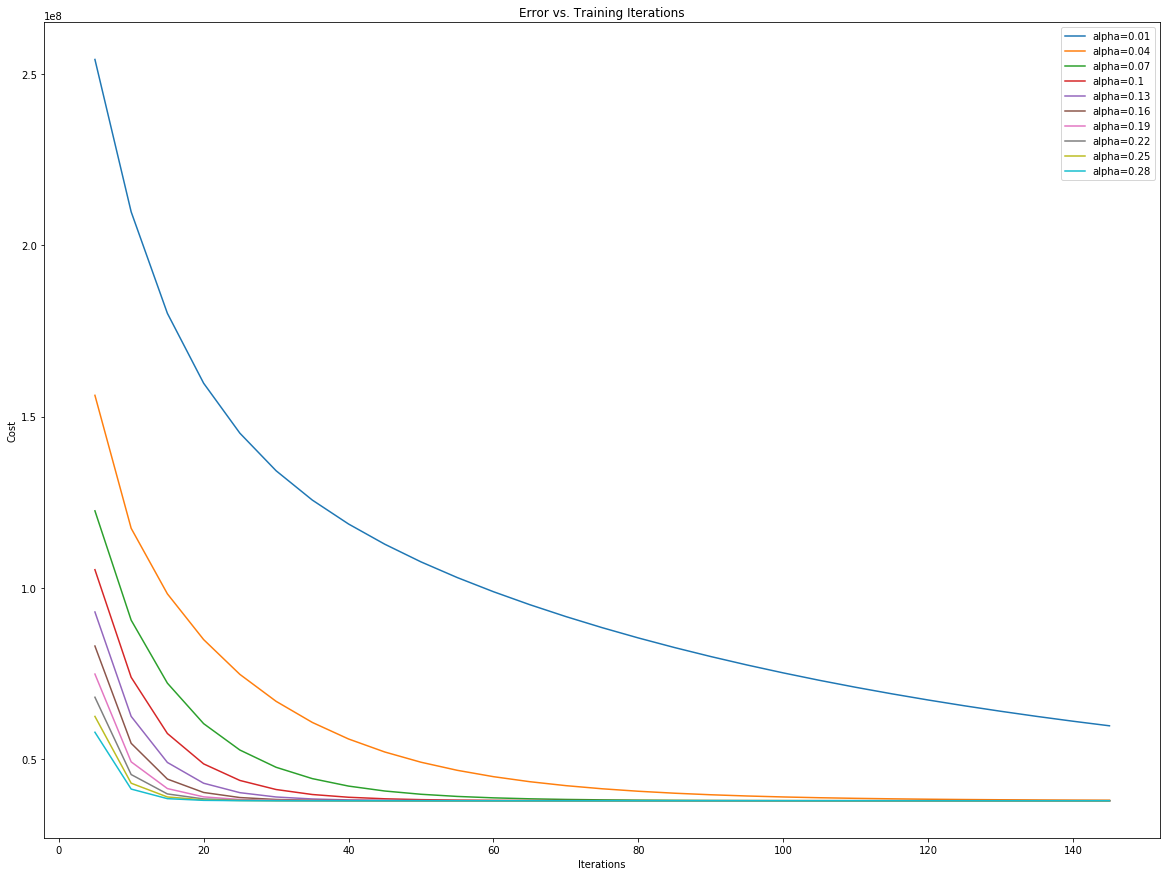

In [ ]:
# Используйте следующий код, чтобы построить график скорости обучения.
# Для построения графика функции качества необходимо заполнить списки iters и costs
# Можно построить несколько кривых на одном графике, соответствующих разным скоростям обучения, чтобы выбрать наилучшую
#

plt.figure(figsize=(20, 15))
# поместите сюда ваш код
iters = []

for i in range(0, 90, 10): # <- эти параметры имеет смысл подобрать самостоятельно
    my_model.alpha = i / 100
    costs = []
    for j in iters:
        costs.append(my_model.fit_with_GD(X_train, y_train, j))
    plt.plot(iters, costs)


# не забудьте про легенду
plt.xlabel('Количество итераций')
plt.ylabel(r'Функция качества $Q(\theta)$')
plt.title('Зависимость суммарной ошибки на обучающей выборке от количества итераций')


*Здесь можно написать свои комментарии по поводу графика и выбора наиболее подходящей скорости обучения*

- - -
#### 6. Решить систему нормальных уравнений (метод наименьших квадратов) (0.5 балла)

Как было показано на лекциях, решить задачу построения модели линейной регрессии можно в явном виде с помощью системы нормальных уравнений. Использование формулы для решения системы нормальных уравнений матричным способом не требует нормирования признаков, подбора гиперпараметров и может быть легко реализовано в коде:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Обратите внимание, что здесь так же нужно добавить столбец из единиц в матрицу $\mathbf{X}$, чтобы найти свободный член (смещение).

In [ ]:
# Реализуйте метод fit_with_normal_equations класса LinearRegressionModel перед тем,
# как выполнить приведенный ниже код

my_normal_equations_model = LinearRegressionModel()
cost = my_normal_equations_model.fit_with_normal_equations(X_train, y_train)

print(cost)
print(my_normal_equations_model)

- - -
#### 7. Сравнить разные методы (1.5 балла)

Оцените и сравните решения задачи построения уравнения линейной регрессии методом градиентного спуска и методом решения системы нормальных уравнений (методом наименьших квадратов). В теории они должны быть одинаковыми или хотя бы схожими. Для более полной оценки следует воспользоваться встроенной в библиотеку `sklearn` реализацией [алгоритма **Stochastic Gradient Descent (SGD)**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) в качестве третьего метода для сравнения. Для каждого метода (и полученной с его помощью модели) необходимо вычислить RMSE на **тестовой выборке** как меру производительности. Вы можете использовать готовые функции из библиотеки для вычисления, как показано ниже, вместо того чтобы писать собственный код:

- Какой из методов является наиболее производительным на заданном по варианту датасете?
- Как вы оцениваете ошибку каждой из построенных моделей? Приемлемо? Средне? Плохо?

+2 дополнительных балла за добавление к сравнению еще трех методов: встроенной реализации метода наименьших квадратов ([`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)), гребневой регрессии (метод регуляризации Тихонова, [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)) и регрессии ([`LASSO`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)).

In [ ]:
from sklearn.metrics import mean_squared_error

# Использование встроенной реализации метода стохастического градиентного спуска для построения модели
from sklearn.linear_model import SGDRegressor
my_sgd_model = SGDRegressor()
my_sgd_model.fit(X_train, y_train)
y_predict = my_sgd_model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
my_sgd_model_rmse = np.sqrt(mse)
print("SGD:", my_sgd_model_rmse)

# поместите сюда ваш код

*Здесь можно написать свои комментарии по поводу эффективности рассмотренных методов и качества их реализации*

- - -
#### 8. Опишите полученные результаты (0.5 балла)

Напишите краткие выводы объемом в один абзац, ориентированные на нетехническую аудиторию (например, на вашего менеджера или начальника). Сосредоточьтесь на следующих вопросах:

- Как вы можете эффектно и эффективно представить ваше решение для проблемы прогнозирования целевой переменной из вашего датасета?
- Что вы узнали о проблеме на данный момент?
- Как можно улучшить ваше решение?

*Поместите сюда свой текст*

- - -
### Нужна помощь?

Если у вас возникли трудности при выполнении задания, попробуйте следующие решения:

- Посмотрите слайды к презентации по регрессионному анализу и методам наименьших квадратов, градиентного спуска и стохастического градиентного спуска. Слайды можно найти в личном кабинете или в ТГ-канале курса.
- Задайте вопрос преподавателю в ТГ-канале курса.
- Задайте вопрос преподавателю лично в университете.